### Model 10 settings:

We drop 'half-true' datas and combine classes to 2 classes.

We did TFIDF on data for machine learning models.

We did Word2Vec on data for deep learning models.

Then we have full preproccesing on data.

Stacking is by binary prediction of models.

Embedding dim is 150


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_fscore_support
import Scripts.Data_Read_Prepare as Data_Prepare
import Scripts.Fake_News_Detection_SVM as SVM_classifier
import Scripts.Fake_News_Detection_PA as PA_classifier
import Scripts.Fake_News_Detection_XGBoost as XGBoost_classifier
import Scripts.Fake_News_Detection_LSTM as LSTM_classifier
import Scripts.Fake_News_Detection_BiLSTM as BiLSTM_classifier
import Scripts.Fake_News_Detection_Stacked_MLP as MLP_classifier

Loading data from datasets

In [2]:
data_train, data_valid, data_test = Data_Prepare.read_data()
data_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver


In [3]:
data_train = Data_Prepare.combine_classes_drop_half_true(data_train)
data_valid = Data_Prepare.combine_classes_drop_half_true(data_valid)
data_test = Data_Prepare.combine_classes_drop_half_true(data_test)
data_train.head(3)

,label,sentence
0,0,abortion dwayne-bohac State representative a m...
1,1,foreign-policy barack-obama President Denver H...
2,0,health-care blog-posting nan a news release He...


In [4]:
data_test['label'].value_counts()

0    553
1    449
Name: label, dtype: int64

Preproccesing

In [5]:
data_train1, data_valid1, data_test1 = Data_Prepare.do_preprocessing(data_train, data_valid, data_test)

data_preprocessing done!


In [6]:
data_train2, data_valid2, data_test2 = Data_Prepare.do_preprocessing(data_train, data_valid, data_test,"nosetm")

data_preprocessing_without_stem done!


In [7]:
data_train['label'].value_counts(normalize='true')

0    0.552301
1    0.447699
Name: label, dtype: float64

In [9]:
# Combine the training and validation datasets for training
data_set_all1 = pd.concat([data_train1, data_valid1, data_test1])
data_train_valid1 = pd.concat([data_train1, data_valid1])

X_train_valid1 = data_train_valid1['sentence']
y_train_valid1 = data_train_valid1['label']
X_test1 = data_test['sentence']
y_test1 = data_test['label']

In [10]:
print(X_train_valid1.shape)
print(X_test1.shape)

(9162,)
(1002,)


In [11]:
# Combine the training and validation datasets for training
data_set_all2 = pd.concat([data_train2, data_valid2, data_test2])
data_train_valid2 = pd.concat([data_train2, data_valid2])

X_train_valid2 = data_train_valid2['sentence']
y_train_valid2 = data_train_valid2['label']
X_test2 = data_test['sentence']
y_test2 = data_test['label']

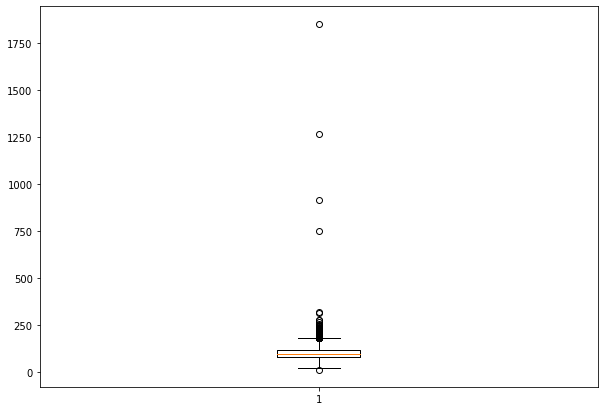

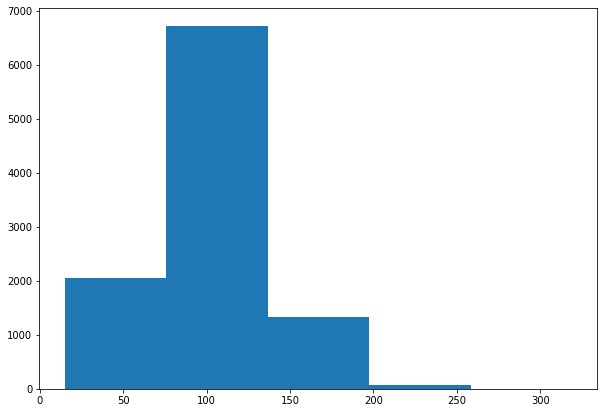

In [102]:
Data_Prepare.plot_data_length(data_set_all)

Vectorizing

In [12]:
X_train_t_v1, X_test_t_v1, vocab_size1, X_train_sequences, X_test_sequences=Data_Prepare.tfidf_vectorizer(X_train_valid1,
                                                                                                          X_test1,
                                                                                                          MAX_SEQUENCE_LENGTH=260,EMBEDDING_DIM=150)

Vectorizing done!


In [26]:
embedding_matrix,X_train_t_v2, y_train_t_v2, X_test_t_v2, y_test_t_v2, vocab_size2 = Data_Prepare.tokenize_vectorize(data_set_all2,
                                                                                                                data_train_valid2,
                                                                                                                data_test2,
                                                                                                                MAX_SEQUENCE_LENGTH=260
                                                                                                                ,EMBEDDING_DIM=150)

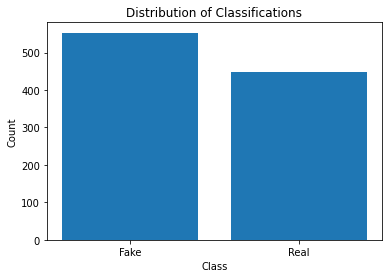

In [122]:
#Visualizing distribution of predeiction of ensemble clas
class_counts = np.bincount(y_test)
plt.bar(range(len(class_counts)), class_counts)
class_labels = ['Fake', 'Real']
plt.xticks(range(len(class_counts)), class_labels)
plt.title('Distribution of Classifications')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 1- SVM

In [14]:
svm_predictions, svm_train_valid_predictions =SVM_classifier.train_svm(X_train_t_v1, y_train_valid1, X_test_t_v1)

Execution time of SVM: 22.79 seconds


SVM - accuracy: 0.5858283433133733
SVM - Precision: 0.5374449339207048
SVM - Recall: 0.5434298440979956
SVM - F-score: 0.540420819490587


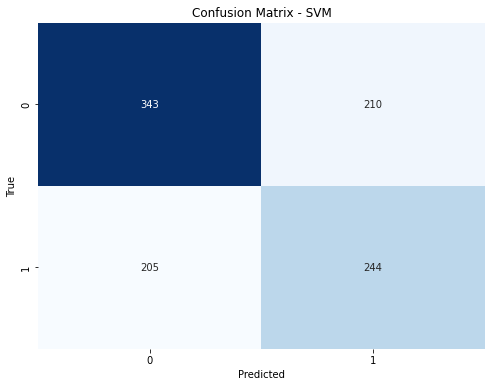

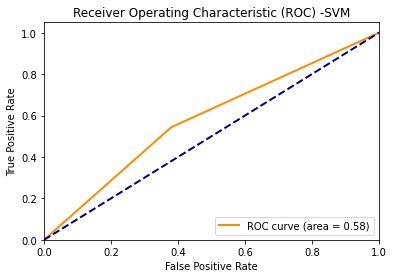

In [15]:
svm_accuracy, svm_precision, svm_recall, svm_fscore = SVM_classifier.svm_metrics(svm_predictions, y_test1)
SVM_classifier.svm_confusion_matrix_plot(svm_predictions, y_test1)
SVM_classifier.svm_roc_plot(svm_predictions, y_test1)

## 2-Passive Aggressive

In [17]:
pa_predictions,pa_train_valid_predictions, pa_scores, pa_train_scores = PA_classifier.train_pa(X_train_t_v1,
                                                                                               y_train_valid1,
                                                                                               X_test_t_v1,
                                                                                               c = 0.1,
                                                                                               iteration=100, tol=1e-1)

Execution time of PA: 0.06 seconds


PA - accuracy: 0.627744510978044
PA - Precision: 0.5931372549019608
PA - Recall: 0.5389755011135857
PA - F-score: 0.5647607934655776


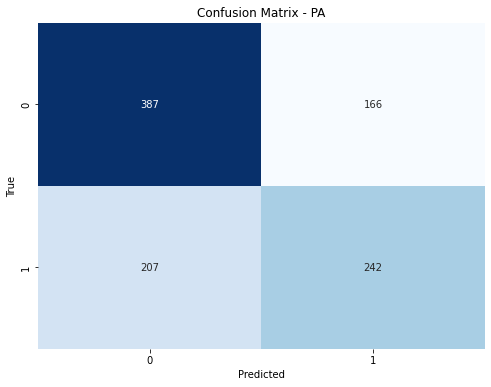

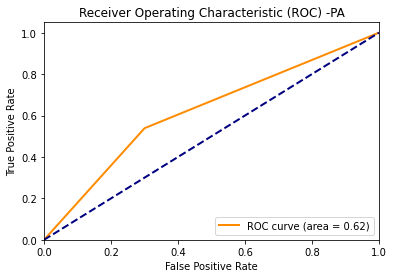

In [20]:
pa_accuracy, pa_precision, pa_recall, pa_fscore = PA_classifier.pa_metrics(pa_predictions, y_test1)
PA_classifier.pa_confusion_matrix_plot(pa_predictions, y_test1)
PA_classifier.pa_roc_plot(pa_predictions, y_test1)

## 3-XGBoost

In [95]:
xgb_params = {
    'objective': 'binary:logistic',  # or 'multi:softmax' for multi-class classification
    'eval_metric': 'logloss',  # or other appropriate evaluation metric
    'eta': 0.01,  # learning rate
    'max_depth': 20,  # maximum depth of a tree
    'subsample': 0.2,  # subsample ratio of the training instances
    'colsample_bytree': 0.2  # subsample ratio of columns when constructing each tree
}

xgb_predictions, xgb_train_valid_predictions, xgb_scores, xgb_train_scores = XGBoost_classifier.train_xgboost(X_train_t_v1,
                                                                                                              y_train_valid1,
                                                                                                              X_test_t_v1,y_test1,
                                                                                                              xgb_params)

Execution time of XGBoost: 24.05 seconds


XGBoost - accuracy: 0.6107784431137725
XGBoost - Precision: 0.5439642324888226
XGBoost - Recall: 0.8129175946547884
XGBoost - F-score: 0.6517857142857144


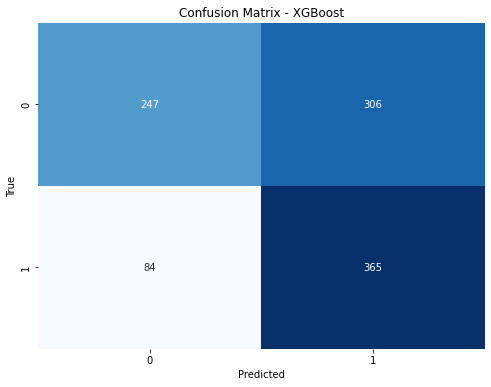

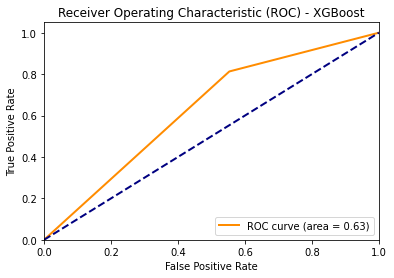

In [96]:
xgb_accuracy, xgb_precision, xgb_recall, xgb_fscore = XGBoost_classifier.xgb_metrics(xgb_predictions, y_test1)
XGBoost_classifier.xgb_confusion_matrix_plot(xgb_predictions, y_test1)
XGBoost_classifier.xgb_roc_plot(xgb_predictions, y_test1)

## 4-LSTM

In [120]:
print(vocab_size2)

8680


In [27]:
lstm_model, lstm_history = LSTM_classifier.train_lstm(vocab_size2,
                                                      embedding_matrix,
                                                      X_train_t_v2,
                                                      y_train_t_v2,
                                                      epoches=10,
                                                      batch_size=128,
                                                      MAX_SEQUENCE_LENGTH=260,
                                                      EMBEDDING_DIM=150)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddings (Embedding)      (None, 260, 150)          1302000   
                                                                 
 lstm_layer1 (LSTM)          (None, 260, 128)          142848    
                                                                 
 lstm_layer2 (LSTM)          (None, 260, 64)           49408     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [29]:
lstm_train_valid_predictions, lstm_predictions, lstm_train_scores, lstm_scores = LSTM_classifier.predict_lstm(lstm_model,
                                                                              X_train_t_v2,
                                                                              X_test_t_v2,
                                                                             0.4)

287/287 [==============================] - 29s 102ms/step


LSTM - Accuracy: 0.5988023952095808
LSTM - Precision: 0.5387149917627677
LSTM - Recall: 0.7282850779510023
LSTM - F-score: 0.6193181818181819


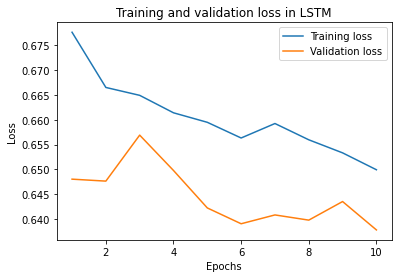

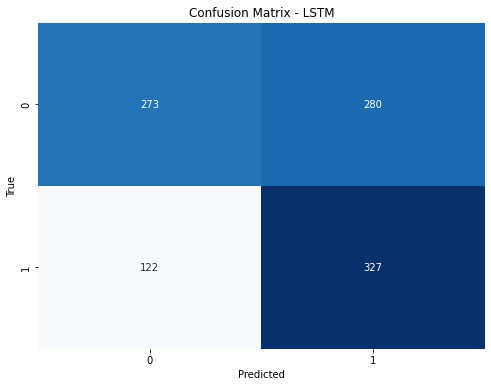

In [31]:
lstm_accuracy, lstm_precision, lstm_recall, lstm_fscore = LSTM_classifier.lstm_metrics(lstm_predictions, y_test_t_v2)
LSTM_classifier.lstm_loss_plot(lstm_history)
LSTM_classifier.lstm_confusion_matrix_plot(lstm_predictions, y_test_t_v2)

## 5-BiLSTM

In [32]:
bilstm_model, bilstm_history = BiLSTM_classifier.train_bilstm(vocab_size2,
                                                              X_train_t_v2,
                                                              y_train_t_v2, 8,64,
                                                              MAX_SEQUENCE_LENGTH = 260,
                                                              EMBEDDING_DIM = 150)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 260, 150)          1302000   
                                                                 
 bidirectional (Bidirectiona  (None, 260, 256)         285696    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,756,209
Trainable params: 454,209
Non-

287/287 [==============================] - 83s 289ms/step
BiLSTM - Accuracy: 0.592814371257485
BiLSTM - Precision: 0.535042735042735
BiLSTM - Recall: 0.6971046770601337
BiLSTM - F-score: 0.6054158607350097


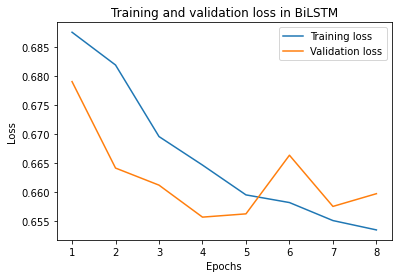

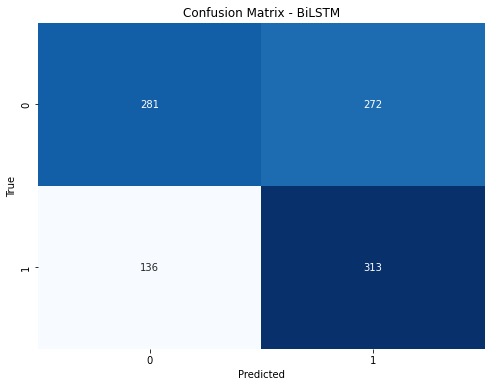

In [33]:
bilstm_train_predictions, bilstm_predictions, bilstm_train_scores,bilstm_scores = BiLSTM_classifier.predict_bilstm(bilstm_model,
                                                                                X_train_t_v2, X_test_t_v2, 0.4)
bilstm_accuracy, bilstm_precision, bilstm_recall, bilstm_fscore=BiLSTM_classifier.bilstm_metrics(bilstm_predictions, y_test_t_v2)
BiLSTM_classifier.bilstm_loss_plot(bilstm_history)
BiLSTM_classifier.bilstm_confusion_matrix_plot(bilstm_predictions, y_test_t_v2)

## Evaluate Ensemblely!

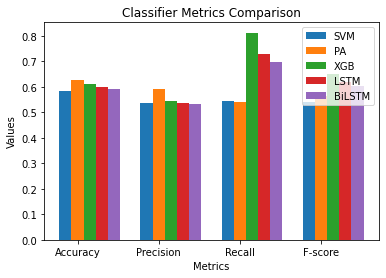

In [97]:
metrics = ['Accuracy','Precision','Recall','F-score'] 
svm = [svm_accuracy, svm_precision, svm_recall, svm_fscore] 
pa=[pa_accuracy, pa_precision, pa_recall, pa_fscore]
xgb=[xgb_accuracy, xgb_precision, xgb_recall, xgb_fscore]
lstm = [lstm_accuracy, lstm_precision, lstm_recall, lstm_fscore] 
bilstm = [bilstm_accuracy, bilstm_precision, bilstm_recall, bilstm_fscore] 

bar_width = 0.15 
index = np.arange(len(metrics))
plt.bar(index, svm, bar_width, label='SVM')
plt.bar(index + bar_width, pa, bar_width, label='PA')
plt.bar(index + 2*bar_width, xgb, bar_width, label='XGB')
plt.bar(index + 3*bar_width, lstm, bar_width, label='LSTM')
plt.bar(index + 4*bar_width, bilstm, bar_width, label='BiLSTM')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classifier Metrics Comparison')

plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()
        

#### Voting Test predictions

In [98]:
import numpy as np
def ensemble_prediction():   
    votes = np.array([list(row) for row in zip(svm_predictions ,xgb_predictions, pa_predictions, lstm_predictions, bilstm_predictions)])
    column_sums = np.sum(votes, axis=1)
    averages_vote = []
    for column_sum in column_sums:
        average = column_sum / 5
        averages_vote.append(average.round())
    return averages_vote

In [99]:
y_pred_ensemble = ensemble_prediction()

accuracy = sum(y_pred_ensemble == y_test1) / len(y_test1)

precision, recall, fscore, support = precision_recall_fscore_support(y_test1, y_pred_ensemble, average='binary')
print("Model - accuracy:", accuracy)
print("Model - Precision:", precision)
print("Model - Recall:", recall)
print("Model - F-score:", fscore)

Model - accuracy: 0.6367265469061876
Model - Precision: 0.5757575757575758
Model - Recall: 0.7193763919821826
Model - F-score: 0.6396039603960396


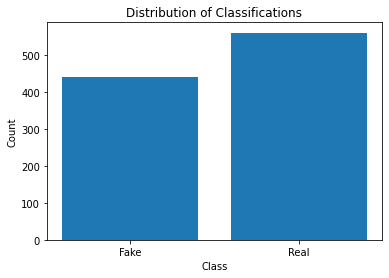

In [100]:
#Visualizing distribution of predeiction of ensemble clas
class_counts = np.bincount(y_pred_ensemble)
plt.bar(range(len(class_counts)), class_counts)
class_labels = ['Fake', 'Real']
plt.xticks(range(len(class_counts)), class_labels)
plt.title('Distribution of Classifications')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Voting train predictions

In [51]:
import numpy as np
def ensemble_train_prediction():   
    votes = np.array([list(row) for row in zip(svm_train_valid_predictions ,
                                               xgb_train_valid_predictions,
                                               pa_train_valid_predictions,
                                               lstm_train_valid_predictions,
                                               bilstm_train_predictions)])
    column_sums = np.sum(votes, axis=1)
    averages_vote = []
    for column_sum in column_sums:
        average = column_sum / 5
        averages_vote.append(average.round())
    return averages_vote

In [53]:
y_train_valid_pred_ensemble = ensemble_train_prediction()

accuracy = sum(y_train_valid_pred_ensemble == y_train_valid1) / len(y_train_valid1)

precision, recall, fscore, support = precision_recall_fscore_support(y_train_valid1, y_train_valid_pred_ensemble, average='binary')
print("Model - accuracy:", accuracy)
print("Model - Precision:", precision)
print("Model - Recall:", recall)
print("Model - F-score:", fscore)

Model - accuracy: 0.7043222003929273
Model - Precision: 0.637624974495001
Model - Recall: 0.7700837851158207
Model - F-score: 0.697622502511441


## FinalClassifier

In [101]:
xgb_train_valid_predictions = np.array(xgb_train_valid_predictions)
xgb_predictions= np.array(xgb_predictions)

stacked_X_train = np.hstack((X_train_t_v2, 
                             svm_train_valid_predictions.reshape((-1, 1)),
                             xgb_train_valid_predictions.reshape((-1, 1)),
                             lstm_train_valid_predictions.reshape((-1, 1)),
                             bilstm_train_predictions.reshape((-1, 1)),
                             pa_train_valid_predictions.reshape((-1, 1))
                            ))
stacked_X_test = np.hstack((X_test_t_v2, 
                            svm_predictions.reshape((-1, 1)),
                            xgb_predictions.reshape((-1, 1)),
                            lstm_predictions.reshape((-1, 1)),
                            bilstm_predictions.reshape((-1, 1)),
                            pa_predictions.reshape((-1, 1))
                           ))


XGBoost - accuracy: 0.4530938123752495
XGBoost - Precision: 0.45025125628140705
XGBoost - Recall: 0.9977728285077951
XGBoost - F-score: 0.6204986149584488


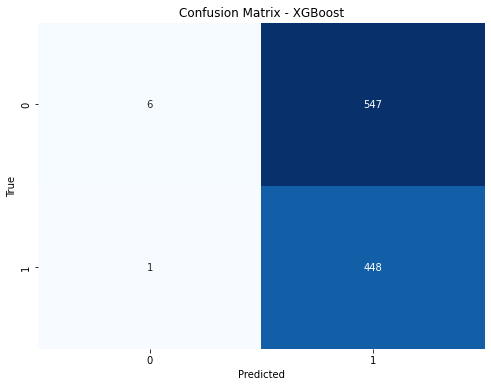

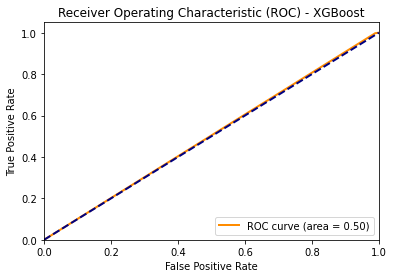

In [111]:
xgb_final_params = {
    'objective': 'binary:logistic',  # or 'multi:softmax' for multi-class classification
    'eval_metric': 'logloss',  # or other appropriate evaluation metric
    'eta': 0.01,  # learning rate
    'max_depth':2,  # maximum depth of a tree
    'subsample': 0.2,  # subsample ratio of the training instances
    'colsample_bytree': 0.8  # subsample ratio of columns when constructing each tree
}
import xgboost as xgb

def train_xgboost(X_train, y_train, X_test, y_test, params, rounds=300, threshold=0.4):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    num_rounds = rounds  # number of boosting rounds (iterations)     
    model = xgb.train(params, dtrain, num_rounds)
    
    
    y_pred = model.predict(dtest)
    y_train_valid_pred = model.predict(dtrain)
    
    xgb_pred_binary = [1 if p >= threshold else 0 for p in y_pred]
    xgb_train_valid_pred_binary = [1 if p >= threshold else 0 for p in y_train_valid_pred]

    return xgb_pred_binary, xgb_train_valid_pred_binary, y_pred, y_train_valid_pred

xgb_predictions_stack3, bla1,y1,y2 = train_xgboost(stacked_X_train3,y_train_valid1,
                                                                     stacked_X_test3,y_test1,
                                                                     xgb_final_params,
                                                                     rounds=20, threshold=0.4)

xgb_accuracy, xgb_precision, xgb_recall, xgb_fscore = XGBoost_classifier.xgb_metrics(xgb_predictions_stack3, y_test1)
XGBoost_classifier.xgb_confusion_matrix_plot(xgb_predictions_stack3, y_test1)
XGBoost_classifier.xgb_roc_plot(xgb_predictions_stack3, y_test2)

## XGBoost stacked

Execution time of XGBoost: 0.28 seconds
XGBoost - accuracy: 0.5708582834331337
XGBoost - Precision: 0.5123216601815823
XGBoost - Recall: 0.8797327394209354
XGBoost - F-score: 0.6475409836065574


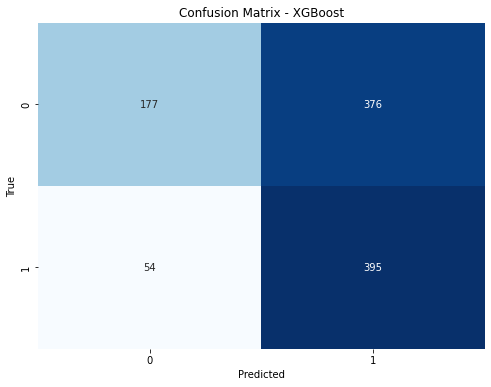

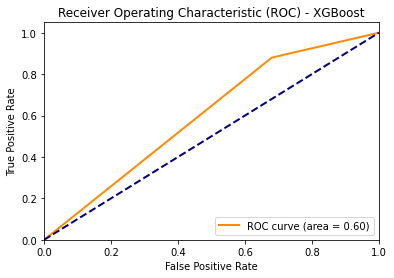

In [92]:
xgb_final_params = {
    'objective': 'binary:logistic',  # or 'multi:softmax' for multi-class classification
    'eval_metric': 'logloss',  # or other appropriate evaluation metric
    'eta': 0.01,  # learning rate
    'max_depth': 2,  # maximum depth of a tree
    'subsample': 0.2,  # subsample ratio of the training instances
    'colsample_bytree': 0.8  # subsample ratio of columns when constructing each tree
}

xgb_predictions_stack, bla1,y1,y2 = XGBoost_classifier.train_xgboost(stacked_X_train,y_train_valid2,
                                                                     stacked_X_test,y_test2,
                                                                     xgb_final_params,
                                                                     rounds=20, threshold=0.4)

xgb_accuracy, xgb_precision, xgb_recall, xgb_fscore = XGBoost_classifier.xgb_metrics(xgb_predictions_stack, y_test1)
XGBoost_classifier.xgb_confusion_matrix_plot(xgb_predictions_stack, y_test1)
XGBoost_classifier.xgb_roc_plot(xgb_predictions_stack, y_test1)